In [1]:
from PIL import Image, ImageFont, ImageDraw

* Instagram size
    * square image
      * 1080 by 1080
    * story
      * 080px by 1920px

In [43]:
from PIL import Image

class ImageMani:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = Image.open(image_path)
        self.original_width, self.original_height = self.image.size
        self.cropped_image = None

    def crop_center(self, crop_width):
        center_x = self.original_width // 2
        center_y = self.original_height // 2

        half_crop_width = crop_width // 2
        left = center_x - half_crop_width
        top = center_y - half_crop_width
        right = left + crop_width
        bottom = top + crop_width

        self.cropped_image = self.image.crop((left, top, right, bottom))

        return self.cropped_image

    def save_cropped_image(self, output_path):
        newsize = (1080, 1080)
        self.cropped_image = self.crop_center(self.original_width)
        self.cropped_image = self.cropped_image.resize(newsize)
        print(self.cropped_image.size)
        self.cropped_image.save(output_path)

    def add_text(self, text, font_size=40, text_color=(255, 255, 255), position=(100, 100), font_path=None):
        if self.cropped_image is None:
            raise ValueError("Please ImageMani error contact Marshmeowllo.")

        draw_image = ImageDraw.Draw(self.cropped_image)

        # If no custom font provided, use default font
        if font_path is None:
            font = ImageFont.load_default()
        else:
            font = ImageFont.truetype(font_path, font_size)

        draw_image.text(position, text, font=font, fill=text_color)

    def show_image(self):
        if self.cropped_image is not None:
            self.cropped_image.show()
        else:
            self.image.show()

(1080, 1080)


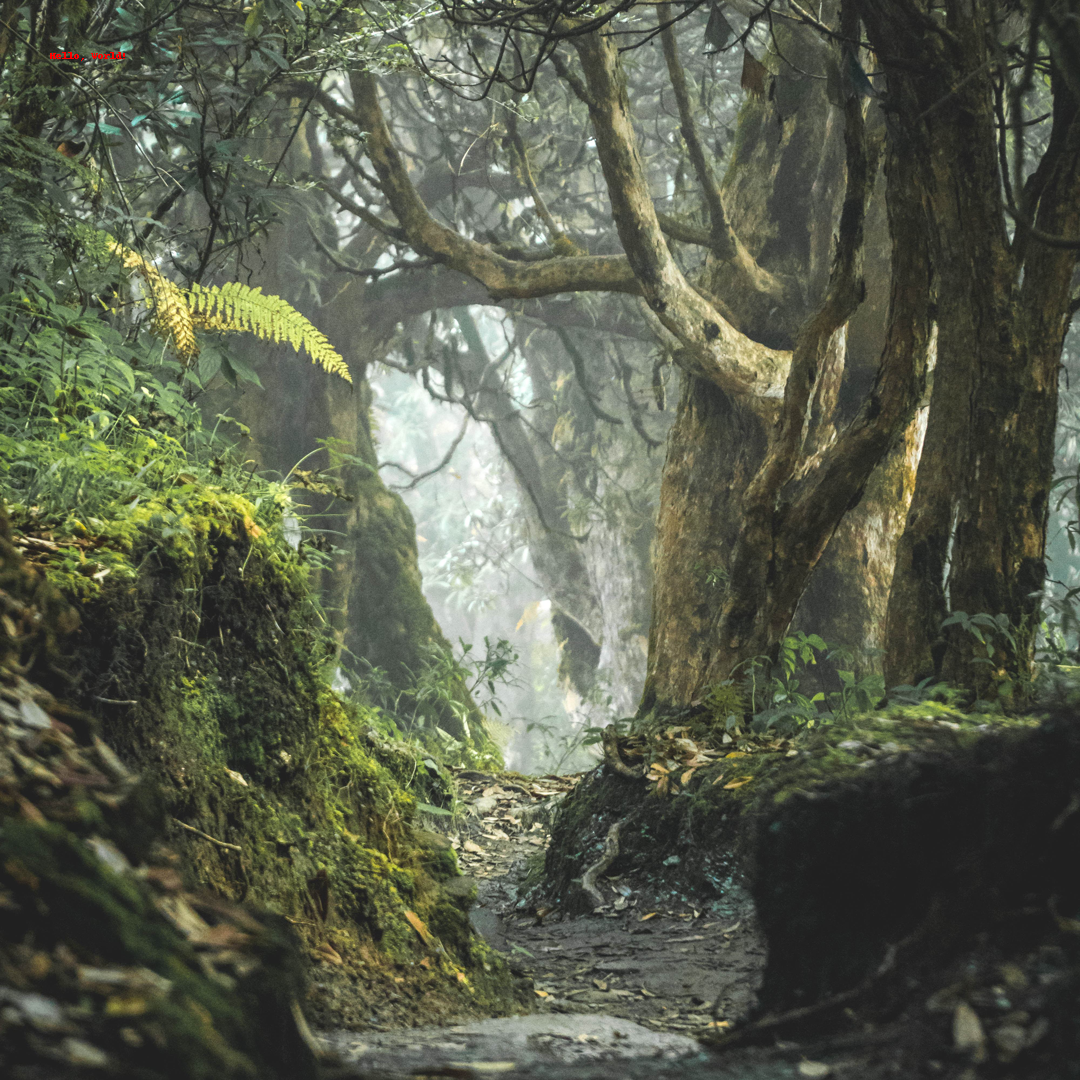

In [44]:
input_image_path = "./resource/sample.jpg"
output_image_path = "./output.jpg"

cropper = ImageMani(input_image_path)
cropper.save_cropped_image(output_image_path)

text_to_add = "Hello, World!"
cropper.add_text(text_to_add, font_size=40, text_color=(255, 0, 0), position=(50, 50))

# Display the cropped image
cropper.show_image()